In [33]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [34]:
class_names = ['Saree', 'Trousers', 'Jeans']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (240, 320)

In [35]:
def load_data():
    """
        Load the data
    """
    
    datasets = [ r'C:\Users\mansnothot\internship\image scraping and classification project\Train',  r'C:\Users\mansnothot\internship\image scraping and classification project\Test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))
    return output

                

In [36]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loading C:\Users\mansnothot\internship\image scraping and classification project\Train


  5%|████▏                                                                              | 3/60 [00:00<00:02, 23.48it/s]

Loading C:\Users\mansnothot\internship\image scraping and classification project\Test


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 101.62it/s]


In [37]:
#! python -m pip install --upgrade pip

In [38]:
#!pip install opencv-python

In [39]:
#pip install tqdm

In [40]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 861
Number of testing examples: 149
Each image is of size: (240, 320)


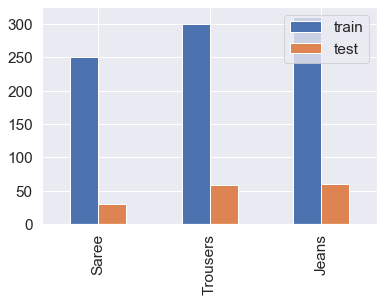

In [41]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

In [42]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [43]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

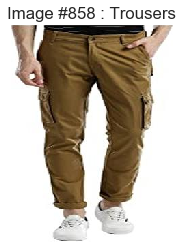

In [44]:
display_random_image(class_names, train_images, train_labels)


In [45]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

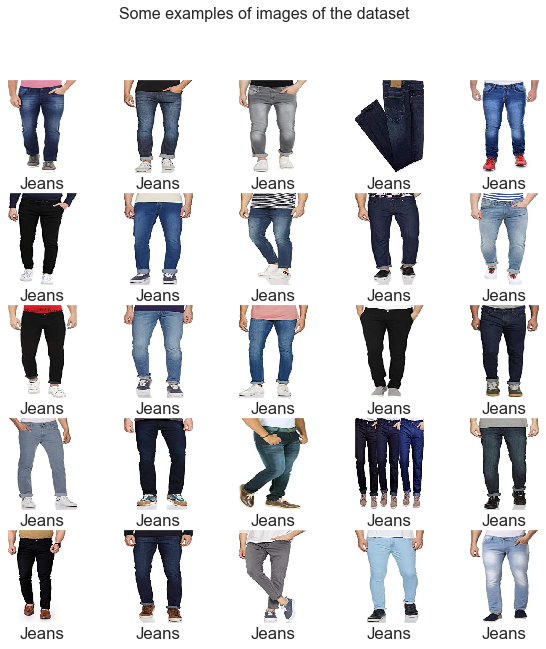

In [46]:
display_examples(class_names, train_images, train_labels)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (320, 240, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [48]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
6/6 [==============================] - 141s 24s/step - loss: 13.6304 - accuracy: 0.3256 - val_loss: 4.8886 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 146s 24s/step - loss: 1.4183 - accuracy: 0.6512 - val_loss: 1.3572 - val_accuracy: 0.0520
Epoch 3/10
6/6 [==============================] - 217s 36s/step - loss: 0.3330 - accuracy: 0.8532 - val_loss: 1.1584 - val_accuracy: 0.3526
Epoch 4/10
6/6 [==============================] - 157s 26s/step - loss: 0.2093 - accuracy: 0.9055 - val_loss: 0.6715 - val_accuracy: 0.7630
Epoch 5/10
6/6 [==============================] - 134s 22s/step - loss: 0.1511 - accuracy: 0.9477 - val_loss: 0.9801 - val_accuracy: 0.6243
Epoch 6/10
6/6 [==============================] - 133s 22s/step - loss: 0.0863 - accuracy: 0.9738 - val_loss: 1.1617 - val_accuracy: 0.5896
Epoch 7/10
6/6 [==============================] - 137s 23s/step - loss: 0.0523 - accuracy: 0.9884 - val_loss: 1.5253 - val_accuracy: 0.5145
Epoch 8/10
6/6 

In [59]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

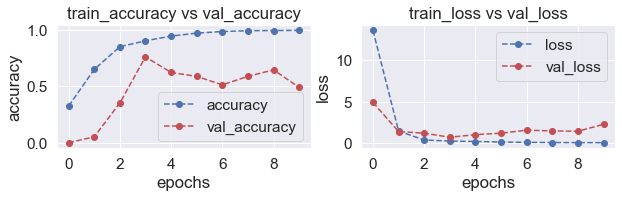

In [60]:
plot_accuracy_loss(history)

In [61]:
test_loss = model.evaluate(test_images, test_labels)

5/5 [==============================] - 3s 632ms/step - loss: 0.9691 - accuracy: 0.7987


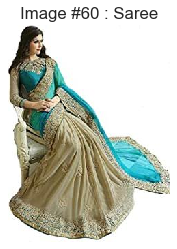

In [62]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [63]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

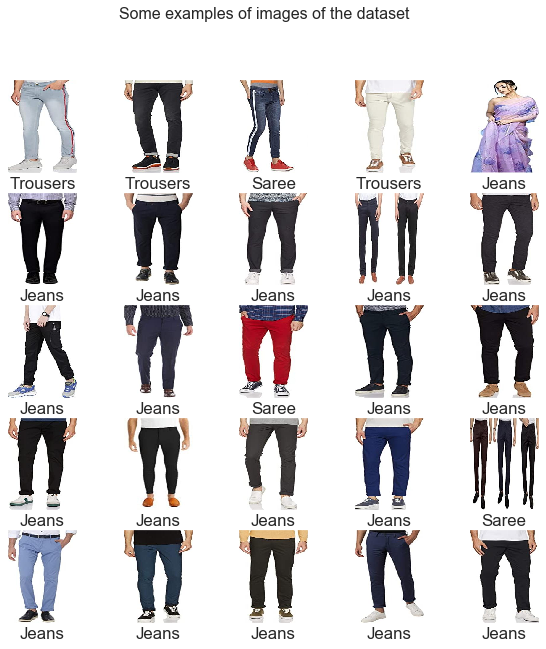

In [64]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

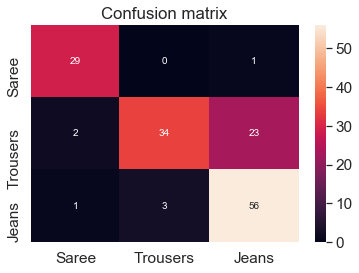

In [65]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
#Clearly jeans and trousers are similar so machine get confused 